# Different levels of coarse-grained models for an external load force larger than the stall force
We consider a force above the stall force. The six-state model for the motor is iteratively coarse
grained for an external load force F = 9 pN. In this situation,
the molecular motor moves backward and the mean velocity
is negative. The backward cycle is dominant. The transitions
in the forward cycle contribute less to the entropy production
than those in the backward cycle.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math
import time
import random
import networkx as nx
import os

import sys
path='../Bibliotheken/'
sys.path.append(path)

import Steady_State_Calculation_Spanning_Trees as auto
import Kinesin_Parameters as Kinesin
import PDF_Flux_entropy as PDF

In [2]:
Force=9e-12
i=1

In [3]:
def entropyProduction(matrix, p):
    P1=0.
    P2=0.
    N=len(matrix)
    #J=CG.NetFlux(matrix,p)
    for i in range(N):
        for j in range(N):
            P1=P1+(matrix[j][i]*p[j]-matrix[i][j]*p[i])*math.log(p[j]/p[i])
            if matrix[i][j]!=0:
                P2=P2+((matrix[j][i]*p[j]-matrix[i][j]*p[i]))*math.log(matrix[j][i]/matrix[i][j])
    P1=0.5*P1
    P2=0.5*P2
    print('P1=dS/dt= '+str(P1))
    print('P2(copling to set of thermodynamic forces)= '+str(P2))
    return P1+P2

def affinity(matrix, p, state1, state2):
    return np.log(matrix[state1][state2]*p[state1])-np.log(matrix[state2][state1]*p[state2])

# 6-state model
## minimal contribution edge  1->2


In [4]:
[w, w1]=Kinesin.Kinesin(force=Force)

#calculate steady-state
G=auto.Matrix2Graph(w)
p=auto.steady_state(G)
print(p)

P_6state=entropyProduction(matrix=w, p=p)
#EntropyProductionChords(w1, p)

print()
print('flux in tri-cyclic 6-state modekl')
flux_6state=w[2-i][5-i]*p[2-i]-w[5-i][2-i]*p[5-i]
print(flux_6state)

print()
print('transition affinities')
A12=affinity(matrix=w, p=p, state1=1-i, state2=2-i)
print('A12 ' +str(A12))
A61=affinity(matrix=w, p=p, state1=6-i, state2=1-i)
A56=affinity(matrix=w, p=p, state1=5-i, state2=6-i)

A25=affinity(matrix=w, p=p, state1=2-i, state2=5-i)
print('A25 ' +str(A25))
A34=affinity(matrix=w, p=p, state1=3-i, state2=4-i)
print('A34 ' +str(A34))

print()
J12=w[1-i][2-i]*p[1-i]-w[2-i][1-i]*p[2-i]
J25=w[2-i][5-i]*p[2-i]-w[5-i][2-i]*p[5-i]
J34=w[3-i][4-i]*p[3-i]-w[4-i][3-i]*p[4-i]
print('entropy contribution')
print('1->2 ' +str(A12*J12))
print('5->6 ' +str(A56*J12))
print('6->1 ' +str(A61*J12))
print('2->5 ' +str(A25*J25))
print('3->4 ' +str(A34*J34))

[3.81003765e-02 3.28987593e-04 4.24909219e-04 9.61128349e-01
 6.78619697e-06 1.05914685e-05]
P1=dS/dt= -1.9184957442131e-16
P2(copling to set of thermodynamic forces)= 1.715343817745544

flux in tri-cyclic 6-state modekl
-0.03723143293549408

transition affinities
A12 0.7345758819234014
A25 -0.08021654351002849
A34 1.486352678298977

entropy contribution
1->2 0.0005759591902157212
5->6 0.005693217234511353
6->1 0.0008016411957848048
2->5 0.0029865768600107687
3->4 0.05650444516852709


# Wcg1
## Merge states 1 and 2

In [5]:
#copying
wcg1=w
#print(wcg1)
#sclicing: delete 1-1 th row (dim=0)
#numpy.delete(arr, obj, axis=None)
wcg1=  np.delete(wcg1, 1-1, 0)
#print(wcg1)
wcg1=np.delete(wcg1, 1-1, 1) #delete 3+1 th column (dim=1)
#print(wcg1)
# new rates
wcg1[1-i][5-i]=w[1-i][6-i]*p[1-i]/(p[1-i]+p[2-i])
wcg1[1-i][4-i]=w[2-i][5-i]*p[2-i]/(p[1-i]+p[2-i])
wcg1[1-i][2-i]=w[2-i][3-i]*p[2-i]/(p[1-i]+p[2-i])
wcg1[5-i][1-i]=w[6-i][1-i]
print()
print(wcg1)
Gcg1=auto.Matrix2Graph(wcg1)
pcg1=auto.steady_state(Gcg1)
print(pcg1)
print(p)
P_5state=entropyProduction(matrix=wcg1, p=pcg1)
print(P_5state)
print(P_6state-P_5state)

print()
print('flux in tri-cyclic 5-state modekl')
flux_5state=wcg1[1-i][4-i]*pcg1[1-i]-wcg1[4-i][1-i]*pcg1[4-i]
print(flux_5state)
print('flux in tri-cyclic 6-state modekl')
flux_6state=w[2-i][5-i]*p[2-i]-w[5-i][2-i]*p[5-i]
print(flux_6state)



[[0.00000000e+00 9.89805892e-01 0.00000000e+00 1.15997165e+01
  1.14630393e-02]
 [5.20290895e-02 0.00000000e+00 1.15620199e+02 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.15620199e-02 0.00000000e+00 3.95529935e-02
  0.00000000e+00]
 [7.11740557e+04 0.00000000e+00 1.40632866e-12 0.00000000e+00
  1.15620199e+02]
 [1.15620199e+02 0.00000000e+00 0.00000000e+00 5.20290895e-02
  0.00000000e+00]]
[3.84293640e-02 4.24909219e-04 9.61128349e-01 6.78619697e-06
 1.05914685e-05]
[3.81003765e-02 3.28987593e-04 4.24909219e-04 9.61128349e-01
 6.78619697e-06 1.05914685e-05]
P1=dS/dt= 2.1459071498919347e-16
P2(copling to set of thermodynamic forces)= 1.7147678585553279
1.714767858555328
0.0005759591902156913

flux in tri-cyclic 5-state modekl
-0.037231432935494024
flux in tri-cyclic 6-state modekl
-0.03723143293549408


# Which edge will be eliminated next?
## edge 5->1

In [6]:
A12=affinity(matrix=wcg1, p=pcg1, state1=1-i, state2=2-i)
A23=affinity(matrix=wcg1, p=pcg1, state1=2-i, state2=3-i)
A34=affinity(matrix=wcg1, p=pcg1, state1=3-i, state2=4-i)
A45=affinity(matrix=wcg1, p=pcg1, state1=4-i, state2=5-i)
A51=affinity(matrix=wcg1, p=pcg1, state1=5-i, state2=1-i)
A14=affinity(matrix=wcg1, p=pcg1, state1=1-i, state2=4-i)

J51=wcg1[5-i][1-i]*pcg1[5-i]-wcg1[1-i][5-i]*pcg1[1-i]
J12=wcg1[1-i][2-i]*pcg1[1-i]-wcg1[2-i][1-i]*pcg1[2-i]
J14=wcg1[1-i][4-i]*pcg1[1-i]-wcg1[4-i][1-i]*pcg1[4-i]
print('entropy contribution')
print('1->2 ' +str(A12*J12))
print('2->3 ' +str(A23*J12))
print('3->4 ' +str(A34*J12))
print('4->5 ' +str(A45*J51))
print('5->1 ' +str(A51*J51))
print('1->4 ' +str(A14*J14))

entropy contribution
1->2 0.2832309899020019
2->3 0.056504445168527116
3->4 1.3655509881944927
4->5 0.005693217234511352
5->1 0.0008016411957848038
1->4 0.002986576860010756


# wcg 2
## coarse grain 5-1

In [7]:
#copying
wcg2=wcg1
#print(wcg2)
#sclicing: delete 5-1 th row (dim=0)
#numpy.delete(arr, obj, axis=None)
wcg2=  np.delete(wcg2, 5-1, 0)
#print(wcg2)
wcg2=np.delete(wcg2, 5-1, 1) #delete 3+1 th column (dim=1)
#print(wcg2)
# new rates
wcg2[1-i][2-i]=(wcg1[1-i][2-i]*pcg1[1-i])/(pcg1[1-i]+pcg1[5-i])
wcg2[1-i][4-i]=(wcg1[1-i][4-i]*pcg1[1-i]+wcg1[5-i][4-i]*pcg1[5-i])/(pcg1[1-i]+pcg1[5-i])
wcg2[4-i][1-i]=wcg1[4-i][1-i]+wcg1[4-i][5-i]
print()
print(wcg2)
Gcg2=auto.Matrix2Graph(wcg2)
pcg2=auto.steady_state(Gcg2)
print(pcg2)
print(pcg1)
P_4state=entropyProduction(matrix=wcg2, p=pcg2)
print(P_4state)
print((P_5state-P_4state)/P_5state)

print()
print('flux in unicyclic 4-state modekl')
flux_4state=wcg2[1-i][4-i]*pcg2[1-i]-wcg2[4-i][1-i]*pcg2[4-i]
print(flux_4state)


[[0.00000000e+00 9.89533168e-01 0.00000000e+00 1.15965347e+01]
 [5.20290895e-02 0.00000000e+00 1.15620199e+02 0.00000000e+00]
 [0.00000000e+00 1.15620199e-02 0.00000000e+00 3.95529935e-02]
 [7.12896759e+04 0.00000000e+00 1.40632866e-12 0.00000000e+00]]
[3.84399555e-02 4.24909219e-04 9.61128349e-01 6.78619697e-06]
[3.84293640e-02 4.24909219e-04 9.61128349e-01 6.78619697e-06
 1.05914685e-05]
P1=dS/dt= 4.996003610813204e-16
P2(copling to set of thermodynamic forces)= 1.708397553528008
1.7083975535280085
0.003714966428567491

flux in unicyclic 4-state modekl
-0.03801550331459169


In [8]:
A12=affinity(matrix=wcg2, p=pcg1, state1=1-i, state2=2-i)
A23=affinity(matrix=wcg2, p=pcg1, state1=2-i, state2=3-i)
A34=affinity(matrix=wcg2, p=pcg1, state1=3-i, state2=4-i)
A41=affinity(matrix=wcg2, p=pcg1, state1=4-i, state2=1-i)

J12=wcg2[1-i][2-i]*pcg2[1-i]-wcg2[2-i][1-i]*pcg2[2-i]
print('entropy contribution')
print('1->2 ' +str(A12*J12))
print('2->3 ' +str(A23*J12))
print('3->4 ' +str(A34*J12))
print('4->1 ' +str(A41*J12))


entropy contribution
1->2 0.28322051394074976
2->3 0.05650444516852709
3->4 1.3655509881944918
4->1 0.0031216062242396562


# Wcg3
# merge 4->1

In [9]:
#copying
wcg3=wcg2
#print(wcg3)
#sclicing: delete 4-1 th row (dim=0)
#numpy.delete(arr, obj, axis=None)
wcg3=  np.delete(wcg3, 4-1, 0)
#print(wcg3)
wcg3=np.delete(wcg3, 4-1, 1) #delete 2-1 th column (dim=1)
#print(wcg3)
# new rates
wcg3[1-i][3-i]=(wcg2[4-i][3-i]*pcg2[4-i])/(pcg2[1-i]+pcg2[4-i])
wcg3[3-i][1-i]=wcg2[3-i][4-i]
wcg3[1-i][2-i]=(wcg2[1-i][2-i]*pcg2[1-i])/(pcg2[1-i]+pcg2[4-i])
print()
print(wcg3)
Gcg3=auto.Matrix2Graph(wcg3)
pcg3=auto.steady_state(Gcg3)
print(pcg3)
print(pcg2)
P_3state=entropyProduction(matrix=wcg3, p=pcg3)
print(P_3state)
print((P_4state-P_3state)/P_4state)

print()
print('flux in unicyclic 3-state modekl')
flux_3state=wcg3[1-i][3-i]*pcg3[1-i]-wcg3[3-i][1-i]*pcg3[3-i]
print(flux_3state)


[[0.00000000e+00 9.89358506e-01 2.48229703e-16]
 [5.20290895e-02 0.00000000e+00 1.15620199e+02]
 [3.95529935e-02 1.15620199e-02 0.00000000e+00]]
[3.84467417e-02 4.24909219e-04 9.61128349e-01]
[3.84399555e-02 4.24909219e-04 9.61128349e-01 6.78619697e-06]
P1=dS/dt= 0.0
P2(copling to set of thermodynamic forces)= 1.705286423265021
1.705286423265021
0.0018210809635982002

flux in unicyclic 3-state modekl
-0.038015503314591755


# Wcg4
# Two state model

In [10]:
wcg4=np.zeros((2,2))
wcg4[2-i][1-i]=(wcg3[2-i][1-i]*pcg3[2-i]+wcg3[3-i][1-i]*pcg3[3-i])/(pcg3[2-i]+pcg3[3-i])
wcg4[1-i][2-i]=wcg3[1-i][2-i]+wcg3[1-i][3-i]
pcg4=[wcg4[2-i][1-i]/(wcg4[2-i][1-i]+wcg4[1-i][2-i]), wcg4[1-i][2-i]/(wcg4[2-i][1-i]+wcg4[1-i][2-i])]
print(pcg4)
print(pcg3)

print()
print('flux in equilibrium 2-state modekl')
flux_2state=wcg4[1-i][2-i]*pcg4[1-i]-wcg4[2-i][1-i]*pcg4[2-i]
print(flux_2state)

[0.03844674171468283, 0.9615532582853172]
[3.84467417e-02 4.24909219e-04 9.61128349e-01]

flux in equilibrium 2-state modekl
0.0


In [11]:
print('fluxes')
print([flux_6state,flux_5state,flux_4state,flux_3state, flux_2state])

fluxes
[-0.03723143293549408, -0.037231432935494024, -0.03801550331459169, -0.038015503314591755, 0.0]


In [12]:
CG_nodes=[0,1/6,2/6,3/6,4/6]
CG_Entropy=[0, (P_6state-P_5state)/P_6state, (P_6state-P_4state)/P_6state, (P_6state-P_3state)/P_6state, (P_6state-0)/P_6state]
diff=np.array(CG_Entropy)-np.array(CG_nodes)
print(diff)
CG_fluxes=[flux_6state-flux_6state,abs(flux_5state-flux_6state)/flux_6state,(flux_4state-flux_6state)/flux_6state,(flux_3state-flux_6state)/flux_6state, (flux_6state-flux_2state)/flux_6state]
print(CG_fluxes)

[ 0.         -0.1663309  -0.32928385 -0.49413681  0.33333333]
[0.0, -1.4909754165904537e-15, 0.021059366166649187, 0.021059366166650863, 1.0]


(0.0, 0.67)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


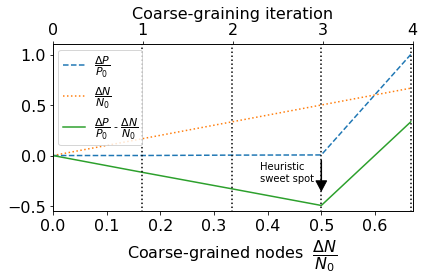

In [13]:
f_size = 16
legend_size = 11

fig, axs = plt.subplots(1,1)
#axs.set_ylabel('Fractional change', fontsize=f_size)
axs.set_xlabel('Coarse-grained nodes  $\dfrac{\Delta N}{N_0}$', fontsize=f_size)
#fig.suptitle('Zero external load force')
    
axs.plot(CG_nodes, CG_Entropy, label='$\dfrac{\Delta P}{P_0}$', linestyle='--')
axs.plot(CG_nodes, CG_nodes, label='$\dfrac{\Delta N}{N_0}$', linestyle='dotted')
axs.plot(CG_nodes, diff, label='$\dfrac{\Delta P}{P_0}$ - $\dfrac{\Delta N}{N_0}$')

axs.arrow( x=0.5, y=-0.05, dx=0, dy=-0.2,  head_width=0.02, head_length=0.1, fc='k', ec='k')  
axs.legend(prop={'size': legend_size}, loc='upper left')
    
#plot iteration
itera1=[[1/6,1/6], [-0.6, 1.1]]
itera2=[[2/6,2/6], [-0.6, 1.1]]
itera3=[[3/6,3/6], [-0.6, 1.1]]
itera4=[[4/6,4/6], [-0.6, 1.1]]
axs.plot(itera1[0], itera1[1], linestyle=':', color='black')
axs.plot(itera2[0], itera2[1], linestyle=':', color='black')
axs.plot(itera3[0], itera3[1], linestyle=':', color='black')
axs.plot(itera4[0], itera4[1], linestyle=':', color='black')
axs.set_ylim([-0.55,1.1])
axs.set_xlim([-0,0.67])
axs.tick_params(axis='both', labelsize=f_size)
    
ax2 = axs.twiny()
ax2.tick_params(axis='both', labelsize=f_size)
print(axs.get_xlim())
new_tick_locations = np.array([0,1,2,3,4])
ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Coarse-graining iteration", fontsize=f_size)
plt.text(2.3, -0.25, 'Heuristic \nsweet spot')

fig.tight_layout()
fig.savefig('Iteratives_CG_Kinesin_Force=9e-12N.eps',bbox_inches="tight")
plt.show()

(0.0, 0.67)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


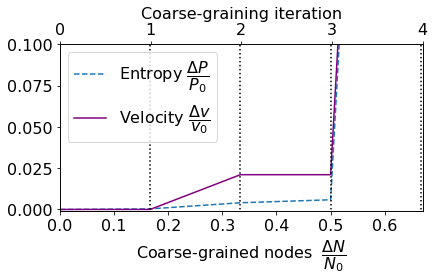

In [14]:
fig, axs = plt.subplots(1,1)
#axs.set_ylabel('Fractional change', fontsize=f_size)
axs.set_xlabel('Coarse-grained nodes  $\dfrac{\Delta N}{N_0}$', fontsize=f_size)
   
axs.plot(CG_nodes, CG_Entropy, label='Entropy $\dfrac{\Delta P}{P_0}$', linestyle='--')   
axs.plot(CG_nodes, CG_fluxes, label='Velocity $\dfrac{\Delta v}{v_0}$', color='purple')
#axs.plot(CG_nodes, diff, label='$\dfrac{\Delta P}{P_0}$ - $\dfrac{\Delta N}{N_0}$')

    
#plot iteration
itera1=[[1/6,1/6], [-0.6, 1.1]]
itera2=[[2/6,2/6], [-0.6, 1.1]]
itera3=[[3/6,3/6], [-0.6, 1.1]]
itera4=[[4/6,4/6], [-0.6, 1.1]]
axs.plot(itera1[0], itera1[1], linestyle=':', color='black')
axs.plot(itera2[0], itera2[1], linestyle=':', color='black')
axs.plot(itera3[0], itera3[1], linestyle=':', color='black')
axs.plot(itera4[0], itera4[1], linestyle=':', color='black')
axs.set_ylim([-0.001,0.1])
axs.set_xlim([-0,0.67])
axs.legend(prop={'size': f_size}, loc='upper left')
axs.tick_params(axis='both', labelsize=f_size)
    
ax2 = axs.twiny()
ax2.tick_params(axis='both', labelsize=f_size)
print(axs.get_xlim())
new_tick_locations = np.array([0,1,2,3, 4])
ax2.set_xticks(new_tick_locations)
#ax2.set_xticklabels(tick_function(new_tick_locations))
ax2.set_xlabel(r"Coarse-graining iteration", fontsize=f_size)
#plt.text(2.3, -0.25, 'Heuristic \nsweet spot')

#axs.arrow( x=0.4, y=0.027, dx=0.05, dy=0.,  head_width=0.01, head_length=0.05, fc='k', ec='k')
#plt.text(2.1, 0.118, 'uni-cyclic\nmodel ',fontsize=15)
#axs.arrow( x=2.5/6, y=0.15, dx=-0.5/6*0.9, dy=0.025,  head_width=0.007, head_length=0.01, fc='k', ec='k')
#axs.arrow( x=2.5/6, y=0.15, dx=0.5/6*0.9, dy=0.025,  head_width=0.007, head_length=0.01, fc='k', ec='k')

#plt.text(3.15, 0.118, 'two-state\nmodel ',fontsize=15)
#axs.arrow( x=3.5/6, y=0.15, dx=0.07, dy=0.025,  head_width=0.007, head_length=0.01, fc='k', ec='k')

#axs.arrow( x=0.5/6, y=0.15, dx=-0.5/6*0.95, dy=0.025,  head_width=0.007, head_length=0.01, fc='k', ec='k')
#axs.arrow( x=0.5/6, y=0.15, dx=0.5/6*0.95, dy=0.025,  head_width=0.007, head_length=0.01, fc='k', ec='k')
#plt.text(0.15, 0.118, 'tri-cyclic\nmodel ',fontsize=15)

fig.tight_layout()
fig.savefig('Iteratives_CG_Kinesin_Force=9e-12N_velocity.eps',bbox_inches="tight")
plt.show()